In [1]:
DEBUG=False

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder
from neural_network_wrapper import NeuralNetworkWrapper
import numpy as np
from sklearn.metrics import accuracy_score
import optimizers

# Importing and cleaning MNIST dataset

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

In [4]:
#one hot encoding
y_ohc = np.zeros((y.size, int(np.max(y))+1))
y_ohc[np.arange(y.size),y.astype(np.int)] = 1
y = y_ohc

if DEBUG:
    X = X[:1000, :]
    y = y[:1000, :]

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

# Training neural network

Loss after 1 epochs: 0.386
Loss after 2 epochs: 0.290
Loss after 3 epochs: 0.246
Loss after 4 epochs: 0.218
Loss after 5 epochs: 0.198
Loss after 6 epochs: 0.182
Loss after 7 epochs: 0.168
Loss after 8 epochs: 0.157
Loss after 9 epochs: 0.148
Loss after 10 epochs: 0.139
Final loss: 0.139


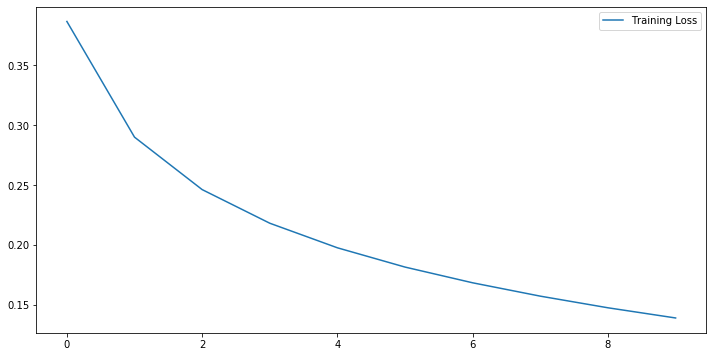

Accuracy on test set: 0.9462142857142857


In [6]:
NN1 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128)
NN1.train(X_train,
          y_train,
          10,
          0)
NN1.plot_loss()

y_hat = NN1.predict(X_test)

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit with validation split

Loss after 1 epochs: 0.404
Loss after 2 epochs: 0.296
Loss after 3 epochs: 0.249
Loss after 4 epochs: 0.220
Loss after 5 epochs: 0.199
Loss after 6 epochs: 0.183
Loss after 7 epochs: 0.170
Loss after 8 epochs: 0.159
Loss after 9 epochs: 0.149
Loss after 10 epochs: 0.141
Final loss: 0.141


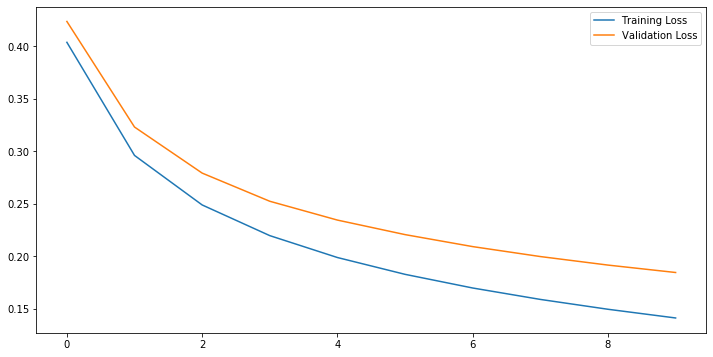

Accuracy on test set: 0.9452857142857143


In [7]:
NN1 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128)
NN1.train(X_train,
          y_train,
          10,
          0.1)
NN1.plot_loss()

y_hat = NN1.predict(X_test)

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Fit without bias

Loss after 1 epochs: 0.424
Loss after 2 epochs: 0.298
Loss after 3 epochs: 0.245
Loss after 4 epochs: 0.213
Loss after 5 epochs: 0.190
Loss after 6 epochs: 0.173
Loss after 7 epochs: 0.159
Loss after 8 epochs: 0.148
Loss after 9 epochs: 0.139
Loss after 10 epochs: 0.130
Final loss: 0.130


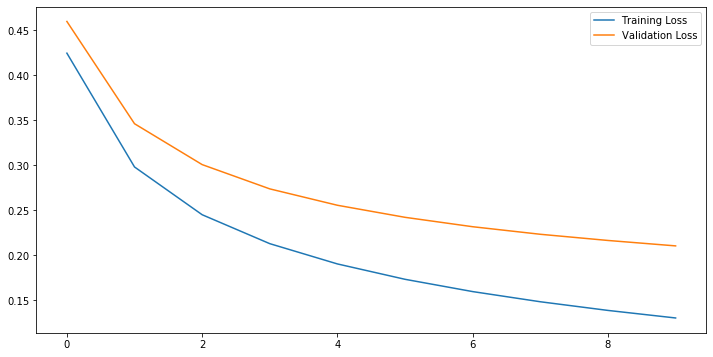

Accuracy on test set: 0.9461428571428572


In [8]:
NN2 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.Optimizer(),
                          128,
                          bias=False)
NN2.train(X_train,
          y_train,
          10,
          0.1)
NN2.plot_loss()

y_hat = NN2.predict(X_test)

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')

# Gradient Descent with momentum

Loss after 1 epochs: 0.419
Loss after 2 epochs: 0.306
Loss after 3 epochs: 0.256
Loss after 4 epochs: 0.224
Loss after 5 epochs: 0.202
Loss after 6 epochs: 0.185
Loss after 7 epochs: 0.171
Loss after 8 epochs: 0.160
Loss after 9 epochs: 0.150
Loss after 10 epochs: 0.141
Final loss: 0.141


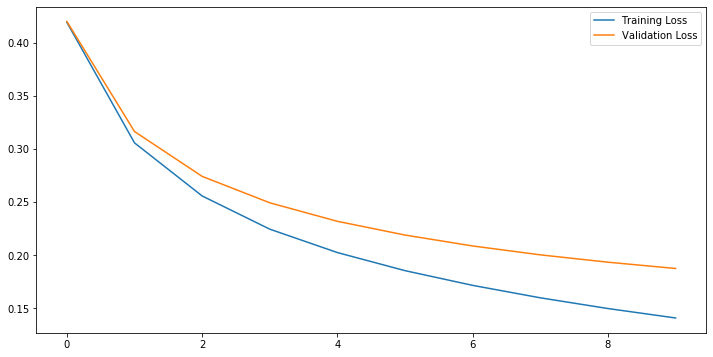

Accuracy on test set: 0.946


In [9]:
NN3 = NeuralNetworkWrapper(784,
                          [128, 64, 10],
                          ['relu', 'relu', 'softmax'],
                          'max_likelihood_loss',
                          0.01,
                           optimizers.GDwithMomentum(momentum_ratio=0.8),
                          128)
NN3.train(X_train,
          y_train,
          10,
          0.1)
NN3.plot_loss()

y_hat = NN3.predict(X_test)

y_tmp = np.zeros_like(y_hat)
y_tmp[np.arange(len(y_hat)), y_hat.argmax(1)] = 1
y_hat = y_tmp

accuracy = accuracy_score(y_test, y_hat)

print(f'Accuracy on test set: {accuracy}')